In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import r_regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# configure the plots to make it clear
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df

Unnamed: 0   Age  Gender    Education Level              Job Title  \
0              0  32.0    Male         Bachelor's      Software Engineer   
1              1  28.0  Female           Master's           Data Analyst   
2              2  45.0    Male                PhD         Senior Manager   
3              3  36.0  Female         Bachelor's        Sales Associate   
4              4  52.0    Male           Master's               Director   
...          ...   ...     ...                ...                    ...   
6699        6699  49.0  Female                PhD  Director of Marketing   
6700        6700  32.0    Male        High School        Sales Associate   
6701        6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702        6702  46.0    Male    Master's Degree      Marketing Manager   
6703        6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary    Country        Race  
0                     5.0   90000.0         UK       White  
1                     3.0   65000.0        USA    Hispanic  
2                    15.0  150000.0     Canada       White  
3                     7.0   60000.0        USA    Hispanic  
4                    20.0  200000.0        USA       Asian  
...                   ...       ...        ...         ...  
6699                 20.0  200000.0         UK       Mixed  
6700                  3.0   50000.0  Australia  Australian  
6701                  4.0   55000.0      China     Chinese  
6702                 14.0  140000.0      China      Korean  
6703                  1.0   35000.0     Canada       Black  

[6704 rows x 9 columns]

In [ ]:
# education level and how it affects salary
# race and how it affects salary
# years of experience and salary
# age and how it affects salary

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)
df

Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary    Country        Race  
0                     5.0   90000.0         UK       White  
1                     3.0   65000.0        USA    Hispanic  
2                    15.0  150000.0     Canada       White  
3                     7.0   60000.0        USA    Hispanic  
4                    20.0  200000.0        USA       Asian  
...                   ...       ...        ...         ...  
6699                 20.0  200000.0         UK       Mixed  
6700                  3.0   50000.0  Australia  Australian  
6701                  4.0   55000.0      China     Chinese  
6702                 14.0  140000.0      China      Korean  
6703                  1.0   35000.0     Canada       Black  

[6704 rows x 8 columns]

In [4]:
# finding any duplicates or nan rows
df.isnull().values.any()

True

In [5]:
df.dropna(inplace=True)
df

Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary    Country        Race  
0                     5.0   90000.0         UK       White  
1                     3.0   65000.0        USA    Hispanic  
2                    15.0  150000.0     Canada       White  
3                     7.0   60000.0        USA    Hispanic  
4                    20.0  200000.0        USA       Asian  
...                   ...       ...        ...         ...  
6699                 20.0  200000.0         UK       Mixed  
6700                  3.0   50000.0  Australia  Australian  
6701                  4.0   55000.0      China     Chinese  
6702                 14.0  140000.0      China      Korean  
6703                  1.0   35000.0     Canada       Black  

[6698 rows x 8 columns]

In [7]:
# notice in education level column, there are Bachelor's and Bachelor's Degree, but they mean the same thing?
print(df['Education Level'].unique())

# replacing all Bachelor's Degree with  Bachelor's
df.replace('Bachelor\'s Degree',
           'Bachelor\'s',
           inplace=True
)

# replace Master's Degree with Master's
df.replace(
    'Master\'s Degree',
    'Master\'s',
    inplace=True
)

# replace phD with PhD
df.replace(
    'phD',
    'PhD',
    inplace=True
)

["Bachelor's" "Master's" 'PhD' 'High School']


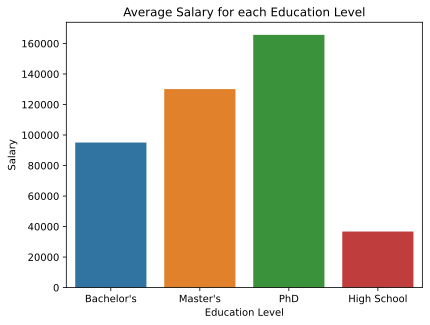

In [8]:
# education level and how it affects salary
sns.barplot(
    data=df,
    x='Education Level',
    y='Salary',
    errorbar=None
)

plt.title('Average Salary for each Education Level')
plt.show()

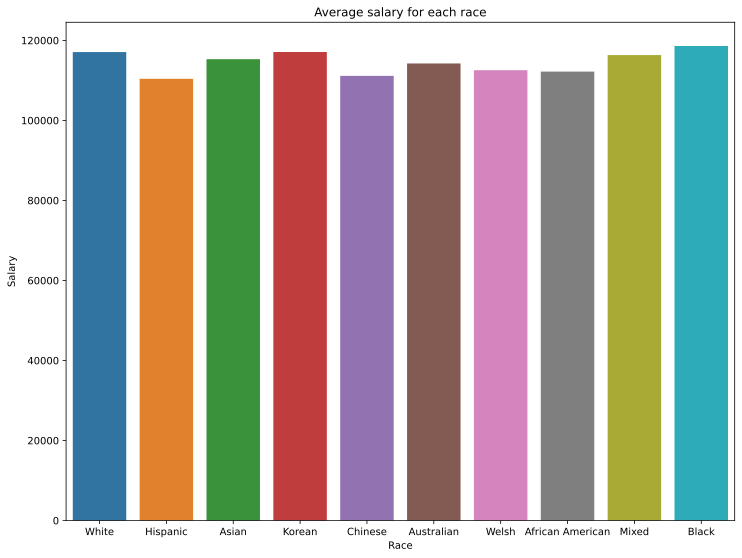

In [9]:
# race and how it affects salary
plt.figure(figsize=(12,9))

sns.barplot(
    data=df,
    x='Race',
    y='Salary',
    errorbar=None
)

plt.title('Average salary for each race')
plt.show()

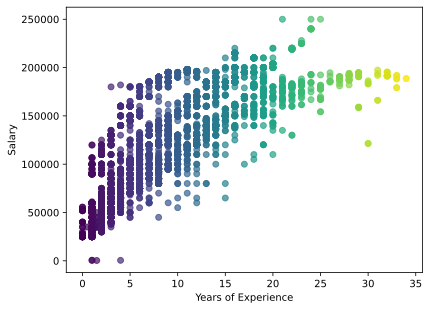

In [10]:
# years of experience and salary
plt.scatter(
    x=df['Years of Experience'],
    y=df['Salary'],
    alpha=0.7,
    c=df['Years of Experience'],
    cmap='viridis',
)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

In [ ]:
# generally, the higher the years of experience, the higher the salary.
# but after 25 years, the relationship seems to plateau.

In [11]:
# using scikit learn to calculate pearson product moment correlation coefficient
r_regression(
    df['Years of Experience'].values.reshape(-1,1),
    df['Salary']
)

array([0.80896817])

In [12]:
# using numpy to calculate pearson product moment correlation coefficient
np.corrcoef(
    df['Years of Experience'],
    df['Salary'],
    rowvar=False
)

array([[1.        , 0.80896817],
       [0.80896817, 1.        ]])

In [13]:
# using pandas to calculate pearson product moment correlation coefficient
df.corr(
    method='pearson',
    numeric_only=True
)

Age  Years of Experience    Salary
Age                  1.000000             0.937725  0.728061
Years of Experience  0.937725             1.000000  0.808968
Salary               0.728061             0.808968  1.000000

# We can see that there is a strong linear correlation between:


1.   Years of Experience and Age (r=0.937725)
2.   Age and Salary (r=0.728061)
3.   Years of Experience and Salary (r=0.808968)



In [14]:
# perform linear regression and training of model
reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(
    df['Years of Experience'],
    df['Salary'],
    test_size=0.25,
    random_state=42
)


reg.fit(X_train.values.reshape(-1,1), y_train)
gradient = reg.coef_[0]
intercept = reg.intercept_


print(f'The gradient is {gradient:.2f}, with intercept {intercept:.2f}.')
print(f'The r^2 value for this model is {reg.score(X_train.values.reshape(-1,1), y_train):.5f}.')
print(f'For X_train and y_train: {reg.score(X_train.values.reshape(-1,1), y_train) * 100:.3f}% of values can be explained by the model.')

The gradient is 7105.95, with intercept 57926.97.
The r^2 value for this model is 0.65644.
For X_train and y_train: 65.644% of values can be explained by the model.


In [15]:
# testing the model with X_test and y_test
y_predicted = reg.predict(X_test.values.reshape(-1, 1))
print(f'The mean squared error is {mean_squared_error(y_test, y_predicted):.2f}.')
print(f'For X_test and y_test: {r2_score(y_test, y_predicted) * 100:.3f}% of the values can be explained by the model.')

The mean squared error is 1002554136.05.
For X_test and y_test: 64.838% of the values can be explained by the model.


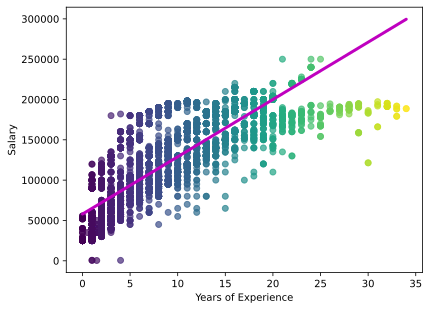

In [16]:
# draw regression line along with the scatter graph
plt.plot(
    df['Years of Experience'],
    gradient * df['Years of Experience'] + intercept,
    color='m',
    linewidth=3
)

plt.scatter(
    x=df['Years of Experience'],
    y=df['Salary'],
    alpha=0.7,
    c=df['Years of Experience'],
    cmap='viridis',
)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

In [17]:
df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [18]:
# add a new column containing the iso country codes for each country
# this is done to prepare the data for plotly to plot a chloropleth map

iso_code = {
    'UK': 'GBR',
    'USA': 'USA',
    'Canada': 'CAN',
    'China': 'CHN',
    'Australia': 'AUS'
}

df['ISO code'] = df['Country'].map(iso_code)
df

Age  Gender Education Level              Job Title  \
0     32.0    Male      Bachelor's      Software Engineer   
1     28.0  Female        Master's           Data Analyst   
2     45.0    Male             PhD         Senior Manager   
3     36.0  Female      Bachelor's        Sales Associate   
4     52.0    Male        Master's               Director   
...    ...     ...             ...                    ...   
6699  49.0  Female             PhD  Director of Marketing   
6700  32.0    Male     High School        Sales Associate   
6701  30.0  Female      Bachelor's      Financial Manager   
6702  46.0    Male        Master's      Marketing Manager   
6703  26.0  Female     High School        Sales Executive   

      Years of Experience    Salary    Country        Race ISO code  
0                     5.0   90000.0         UK       White      GBR  
1                     3.0   65000.0        USA    Hispanic      USA  
2                    15.0  150000.0     Canada       White      CAN  
3                     7.0   60000.0        USA    Hispanic      USA  
4                    20.0  200000.0        USA       Asian      USA  
...                   ...       ...        ...         ...      ...  
6699                 20.0  200000.0         UK       Mixed      GBR  
6700                  3.0   50000.0  Australia  Australian      AUS  
6701                  4.0   55000.0      China     Chinese      CHN  
6702                 14.0  140000.0      China      Korean      CHN  
6703                  1.0   35000.0     Canada       Black      CAN  

[6698 rows x 9 columns]

In [19]:
gbr = df.loc[df['ISO code'] == 'GBR']
mean_gbr = gbr['Salary'].sum()/len(gbr)
print(mean_gbr)

usa = df.loc[df['ISO code'] == 'USA']
mean_usa = usa['Salary'].sum()/len(usa)
print(mean_usa)

can = df.loc[df['ISO code'] == 'CAN']
mean_can = can['Salary'].sum()/len(can)
print(mean_can)

aus = df.loc[df['ISO code'] == 'AUS']
mean_aus = aus['Salary'].sum()/len(aus)
print(mean_aus)

chn = df.loc[df['ISO code'] == 'CHN']
mean_chn = chn['Salary'].sum()/len(chn)
print(mean_chn)

mean_salary = {
    'UK': mean_gbr,
    'USA': mean_usa,
    'Canada': mean_can,
    'China': mean_chn,
    'Australia': mean_aus
}

df['Mean Salary'] = df['Country'].map(mean_salary)
df

115951.10112359551
112995.48785871964
116556.73283018867
114917.38248502994
116271.37379002234


Age  Gender Education Level              Job Title  \
0     32.0    Male      Bachelor's      Software Engineer   
1     28.0  Female        Master's           Data Analyst   
2     45.0    Male             PhD         Senior Manager   
3     36.0  Female      Bachelor's        Sales Associate   
4     52.0    Male        Master's               Director   
...    ...     ...             ...                    ...   
6699  49.0  Female             PhD  Director of Marketing   
6700  32.0    Male     High School        Sales Associate   
6701  30.0  Female      Bachelor's      Financial Manager   
6702  46.0    Male        Master's      Marketing Manager   
6703  26.0  Female     High School        Sales Executive   

      Years of Experience    Salary    Country        Race ISO code  \
0                     5.0   90000.0         UK       White      GBR   
1                     3.0   65000.0        USA    Hispanic      USA   
2                    15.0  150000.0     Canada       White      CAN   
3                     7.0   60000.0        USA    Hispanic      USA   
4                    20.0  200000.0        USA       Asian      USA   
...                   ...       ...        ...         ...      ...   
6699                 20.0  200000.0         UK       Mixed      GBR   
6700                  3.0   50000.0  Australia  Australian      AUS   
6701                  4.0   55000.0      China     Chinese      CHN   
6702                 14.0  140000.0      China      Korean      CHN   
6703                  1.0   35000.0     Canada       Black      CAN   

        Mean Salary  
0     115951.101124  
1     112995.487859  
2     116556.732830  
3     112995.487859  
4     112995.487859  
...             ...  
6699  115951.101124  
6700  114917.382485  
6701  116271.373790  
6702  116271.373790  
6703  116556.732830  

[6698 rows x 10 columns]

In [61]:
# using plotly to plot a chloropleth map
import plotly.express as px
fig = px.choropleth(
    df,
    locations='ISO code',
    color='Mean Salary',
    hover_name='Mean Salary',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.show()

In [ ]:
# we can see that usa earns the least amount of money, but the difference between the lowest and highest earners are not very big

<Axes: xlabel='Years of Experience', ylabel='Count'>

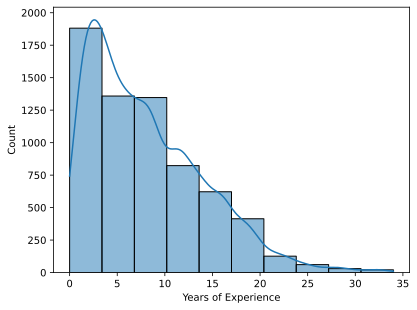

In [60]:
# years of experience and salary histogram
sns.histplot(
    data=df,
    x='Years of Experience',
    bins=10,
    kde=True
)

# data could be skewed as the people with more than 15 years of experience are under-represented

In [51]:
from matplotlib.cbook import print_cycles
# do a logistic regression predicting whether the person is a male or female using salary and years of experience
# first we need to make gender into a binary variable (0 or 1)

# add new column mapping to gender, giving 1 for male and 0 for female
gender = {
    'Male': 1,
    'Female': 0
}

df['Gender Binary'] = df['Gender'].map(gender)

# there was one person who had gender 'Others', so Gender Binary was NaN. I have removed it
df.dropna(inplace=True)
print(df['Gender'].unique())
print(df['Gender Binary'].unique())

['Male' 'Female']
[1. 0.]


<Axes: xlabel='Salary', ylabel='Gender Binary'>

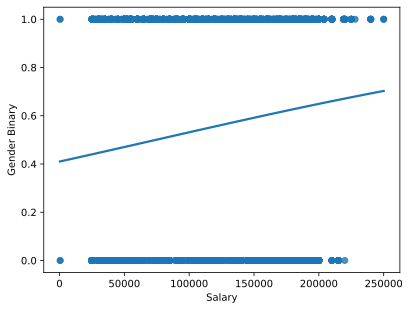

In [52]:
# logistic regression plot of Gender (dependent variable) and Salary (independent variable)
sns.regplot(
    x=df['Salary'],
    y=df['Gender Binary'],
    data=df,
    logistic=True,
    ci=None
)

<Axes: xlabel='Years of Experience', ylabel='Gender Binary'>

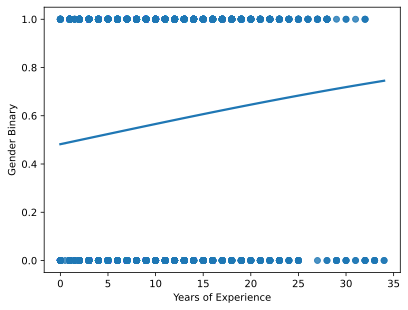

In [53]:
# logistic regression plot of salary (dependent variable) and years of experience (independent variable)
sns.regplot(
    x=df['Years of Experience'],
    y=df['Gender Binary'],
    data=df,
    logistic=True,
    ci=None
)

In [59]:
# use sklearn for logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(
    df[['Years of Experience', 'Salary']],
    df['Gender Binary'],
    test_size=0.2,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(
    y_test,
    y_pred
)


0.5325355272999253